In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv")
dataset.shape

(200, 6)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
dataset.rename(columns = {'BP':'Blood_Pressure', 'Na_to_K':'SaltConsumePerDay'}, inplace = True) 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                200 non-null    int64  
 1   Sex                200 non-null    object 
 2   Blood_Pressure     200 non-null    object 
 3   Cholesterol        200 non-null    object 
 4   SaltConsumePerDay  200 non-null    float64
 5   Drug               200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
dataset['SaltConsumePerDay'] = dataset['SaltConsumePerDay'].round(0)
dataset['SaltConsumePerDay'] = dataset['SaltConsumePerDay'].astype('int')
dataset.head()

,Age,Sex,Blood_Pressure,Cholesterol,SaltConsumePerDay,Drug
0,23,F,HIGH,HIGH,25,drugY
1,47,M,LOW,HIGH,13,drugC
2,47,M,LOW,HIGH,10,drugC
3,28,F,NORMAL,HIGH,8,drugX
4,61,F,LOW,HIGH,18,drugY


In [6]:
age_counts = dataset['Age'].value_counts()
top_ages = age_counts.head(5)
df_2 = pd.DataFrame({'Age': top_ages.index, 'Count': top_ages.values})
dataset

,Age,Sex,Blood_Pressure,Cholesterol,SaltConsumePerDay,Drug
0,23,F,HIGH,HIGH,25,drugY
1,47,M,LOW,HIGH,13,drugC
2,47,M,LOW,HIGH,10,drugC
3,28,F,NORMAL,HIGH,8,drugX
4,61,F,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,12,drugC
196,16,M,LOW,HIGH,12,drugC
197,52,M,NORMAL,HIGH,10,drugX
198,23,M,NORMAL,NORMAL,14,drugX


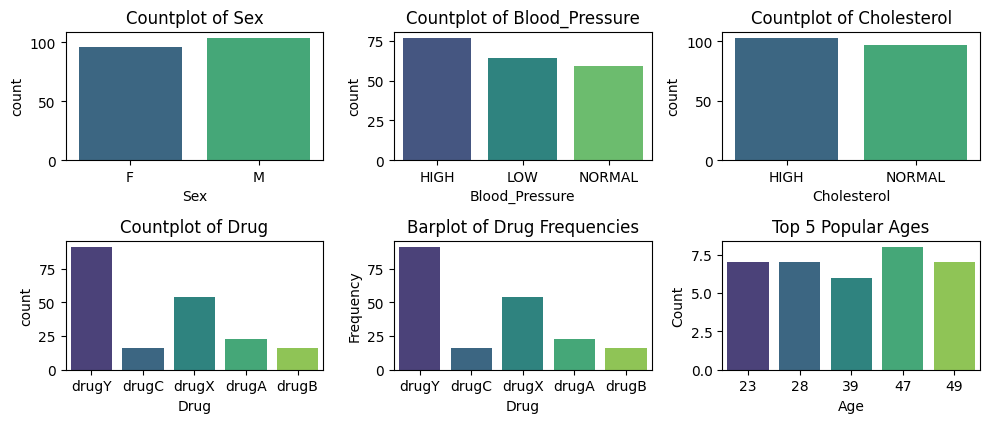

In [7]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 3, 1)
sns.countplot(x='Sex', data=dataset, palette='viridis')
plt.title('Countplot of Sex')

plt.subplot(3, 3, 2)
sns.countplot(x='Blood_Pressure', data=dataset, palette='viridis')
plt.title('Countplot of Blood_Pressure')

plt.subplot(3, 3, 3)  # Corrected subplot position
sns.countplot(x='Cholesterol', data=dataset, palette='viridis')
plt.title('Countplot of Cholesterol')

plt.subplot(3, 3, 4)
sns.countplot(x='Drug', data=dataset, palette='viridis')
plt.title('Countplot of Drug')

plt.subplot(3, 3, 5)
sns.countplot(x='Drug', data=dataset, palette='viridis')
plt.title('Barplot of Drug Frequencies')
plt.xlabel('Drug')
plt.ylabel('Frequency')

plt.subplot(3, 3, 6)
sns.barplot(x='Age', y='Count', data=df_2, palette='viridis')
plt.title('Top 5 Popular Ages')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [8]:
X = dataset.drop(['Drug'], axis=1)

y = dataset['Drug']

In [9]:
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# check the shape of X_train and X_test
X_train.head()

,Age,Sex,Blood_Pressure,Cholesterol,SaltConsumePerDay
169,20,F,HIGH,HIGH,11
97,56,F,HIGH,HIGH,25
31,74,M,HIGH,HIGH,10
12,43,M,LOW,HIGH,15
35,46,M,NORMAL,NORMAL,7


In [11]:
# import category encoders

import category_encoders as ce

# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Sex', 'Blood_Pressure', 'Cholesterol'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [12]:
X_train.head()

,Age,Sex,Blood_Pressure,Cholesterol,SaltConsumePerDay
169,20,1,1,1,11
97,56,1,1,1,25
31,74,2,1,1,10
12,43,2,2,1,15
35,46,2,3,2,7


In [13]:
X_test.head()

,Age,Sex,Blood_Pressure,Cholesterol,SaltConsumePerDay
95,36,2,2,2,11
15,16,1,1,2,16
30,18,1,3,2,9
158,59,1,2,1,10
128,47,2,2,2,34


In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Model Accuracy:", round(accuracy*100,1) )

Model Accuracy: 98.3


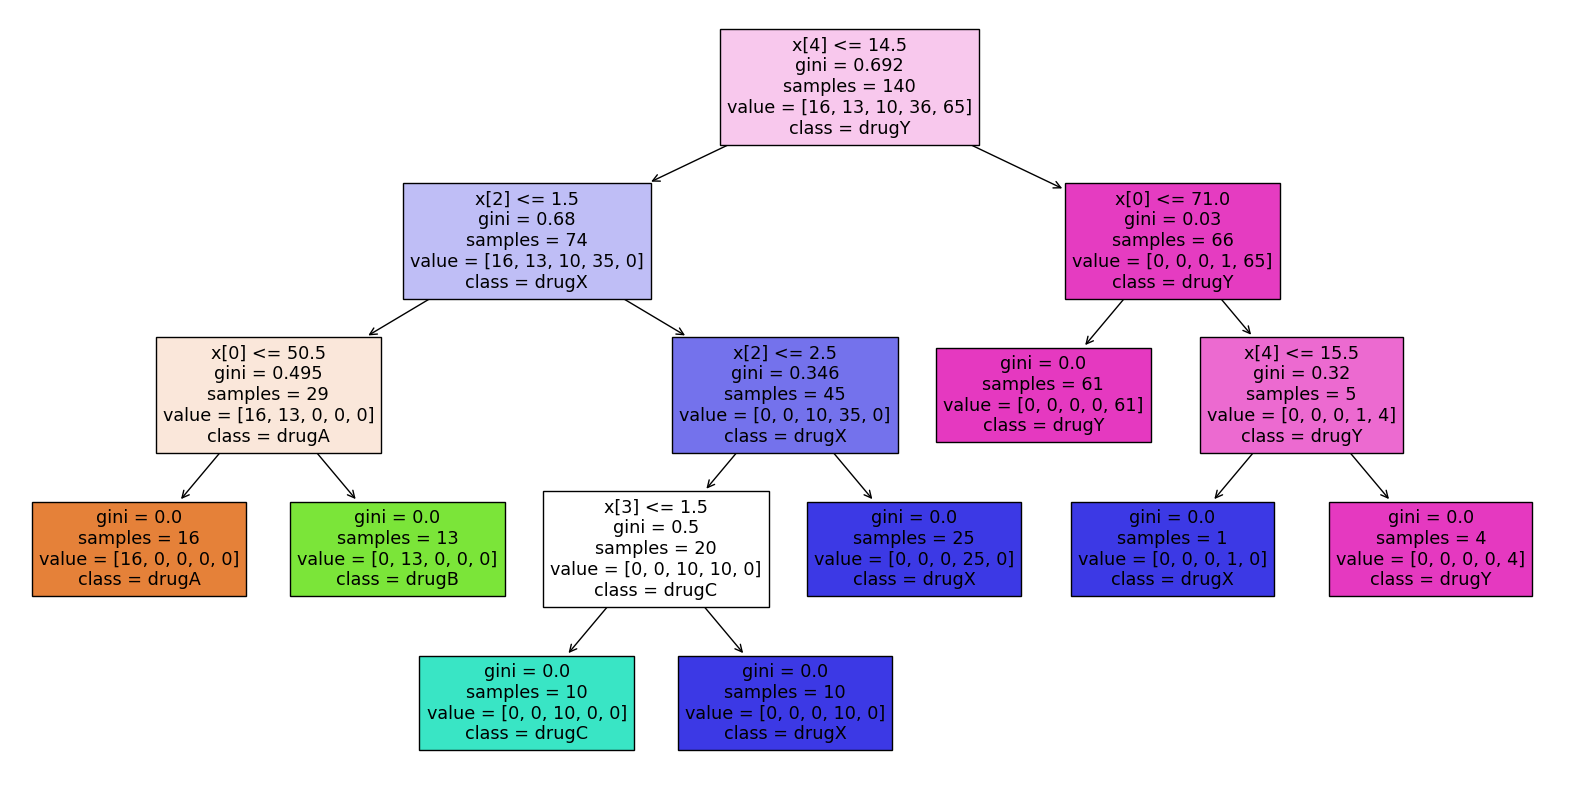

In [15]:
from sklearn.tree import plot_tree
unique_classes = np.unique(y_train)  
plt.figure(figsize=(20,10))
plot_tree(clf, class_names=unique_classes, filled=True)
plt.show()

In [16]:
'''input = df.iloc[:, :-1]
Target = df.iloc[:, -1]
le_sex = LabelEncoder()
le_BP = LabelEncoder()
le_cholesterol = LabelEncoder()
input['Sex'] = le_sex.fit_transform(input['Sex'])
input['Blood_Pressure'] = le_BP.fit_transform(input['Blood_Pressure'])
input['Cholesterol'] = le_cholesterol.fit_transform(input['Cholesterol'])
input'''

"input = df.iloc[:, :-1]\nTarget = df.iloc[:, -1]\nle_sex = LabelEncoder()\nle_BP = LabelEncoder()\nle_cholesterol = LabelEncoder()\ninput['Sex'] = le_sex.fit_transform(input['Sex'])\ninput['Blood_Pressure'] = le_BP.fit_transform(input['Blood_Pressure'])\ninput['Cholesterol'] = le_cholesterol.fit_transform(input['Cholesterol'])\ninput"